# Machine Learning Analysis with Various Datasets

This notebook demonstrates the application of various machine learning models, including linear regression, logistic regression, support vector machines, and decision trees, across different datasets: California housing, diabetes, and Titanic survival. Each section includes data preprocessing, model training, evaluation, and visualizations.

## Datasets Used

1. **California Housing Dataset**
   - Predicts median house values based on various features.
   
2. **Pima Indian Diabetes Dataset**
   - Classifies whether a patient has diabetes based on medical attributes.
   
3. **Titanic Survival Dataset**
   - Predicts survival based on passenger characteristics.

## Contents

### 1. California Housing Dataset
- **Loading and Preprocessing:**
  - Load the dataset from a public URL.
  - Drop rows with missing values.
  - Separate features and target variable.
  - Standardize feature values.
  
- **Model Training:**
  - Train a Linear Regression model.
  - Evaluate using Mean Absolute Error (MAE) and R-squared (R²).
  
- **Stochastic Gradient Descent (SGD):**
  - Train an SGDRegressor and evaluate performance.

### 2. Pima Indian Diabetes Dataset
- **Loading and Preprocessing:**
  - Load the diabetes dataset.
  - Separate features and target variable.
  - Split into training and testing sets.
  
- **Logistic Regression:**
  - Train a Logistic Regression model.
  - Evaluate model performance using accuracy, confusion matrix, and classification report.

### 3. Titanic Survival Dataset
- **Loading and Preprocessing:**
  - Load the Titanic dataset and drop rows with missing values.
  - Separate relevant features and target variable.
  
- **Logistic Regression:**
  - Train another Logistic Regression model on the Titanic dataset.
  - Evaluate using a classification report.
  
- **Support Vector Machine (SVM):**
  - Train an SVM model and evaluate performance.
  
- **Visualizations:**
  - Create a scatter plot to visualize the relationship between age and fare, colored by survival status.

### 4. Comparative Analysis of Classification Models
- **Diabetes Dataset (Repeated Analysis):**
  - Train and evaluate both SVC and Logistic Regression models on the diabetes dataset.
  - Compare their classification reports.
  
- **Decision Tree Classifier:**
  - Train a Decision Tree Classifier on the diabetes dataset.
  - Visualize the decision tree using Graphviz.

## Dependencies

- `pandas`
- `numpy`
- `scikit-learn`
- `seaborn`
- `graphviz`

## Usage

- Run each section of the notebook to execute the analyses sequentially.
- Modify any parameters or models as needed to explore different outcomes.

## Notes

- Ensure that you have internet access to load datasets from the provided URLs.
- The notebook includes various metrics to assess model performance, facilitating a comprehensive understanding of the effectiveness of each approach.


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/california_housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Let's use calculus
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_calculus = model.predict(X_test)

In [ ]:
y_pred_calculus

array([197058.03752153, 157508.79088918, 202099.26270387, ...,
       131098.67538845, 155468.78077784, 166363.59962368])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred_calculus)

51372.67217050054

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_calculus)

0.6400865688993737

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

In [ ]:
y_pred_sgd = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred_sgd)

51528.037779995844

In [ ]:
r2_score(y_test, y_pred_sgd)

0.6395295232375571

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/pima_indian_diabetes.csv")

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
model.coef_

array([[ 0.06454373,  0.03409222, -0.01387313,  0.00328315, -0.00180345,
         0.10261653,  0.62730352,  0.03706176]])

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
model.intercept_

array([-9.0068449])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7467532467532467

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/titanic.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.dropna(inplace=True)

In [ ]:
titanic["Survived"].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [ ]:
X = titanic[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
y = titanic["Survived"]

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
model.coef_

array([[-0.2661273 , -0.03186082, -0.0531654 , -0.31242441,  0.00590506]])

In [ ]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.68      1.00      0.81        23

    accuracy                           0.70        37
   macro avg       0.84      0.61      0.58        37
weighted avg       0.80      0.70      0.64        37



<Axes: xlabel='Age', ylabel='Fare'>

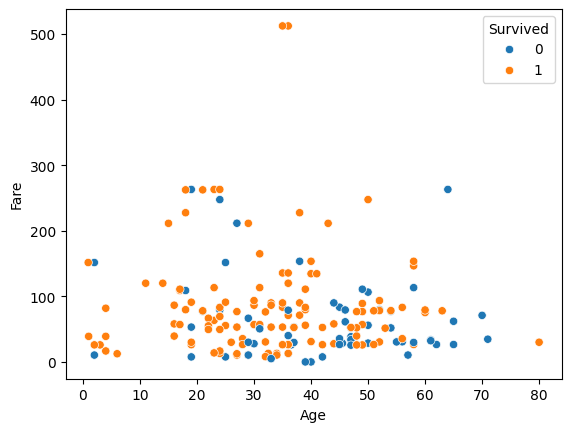

In [ ]:
import seaborn as sns
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="poly", degree=11)
model.fit(X_train, y_train)

SVC(degree=11, kernel='poly')

In [ ]:
y_svm = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_svm)

0.5675675675675675

In [ ]:
accuracy_score(y_test, y_pred)

0.7027027027027027

In [ ]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.60      0.91      0.72        23

    accuracy                           0.57        37
   macro avg       0.30      0.46      0.36        37
weighted avg       0.37      0.57      0.45        37



In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_svm = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_svm)

0.7662337662337663

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_lr = model_lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_lr)

0.7467532467532467

In [ ]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_dt = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



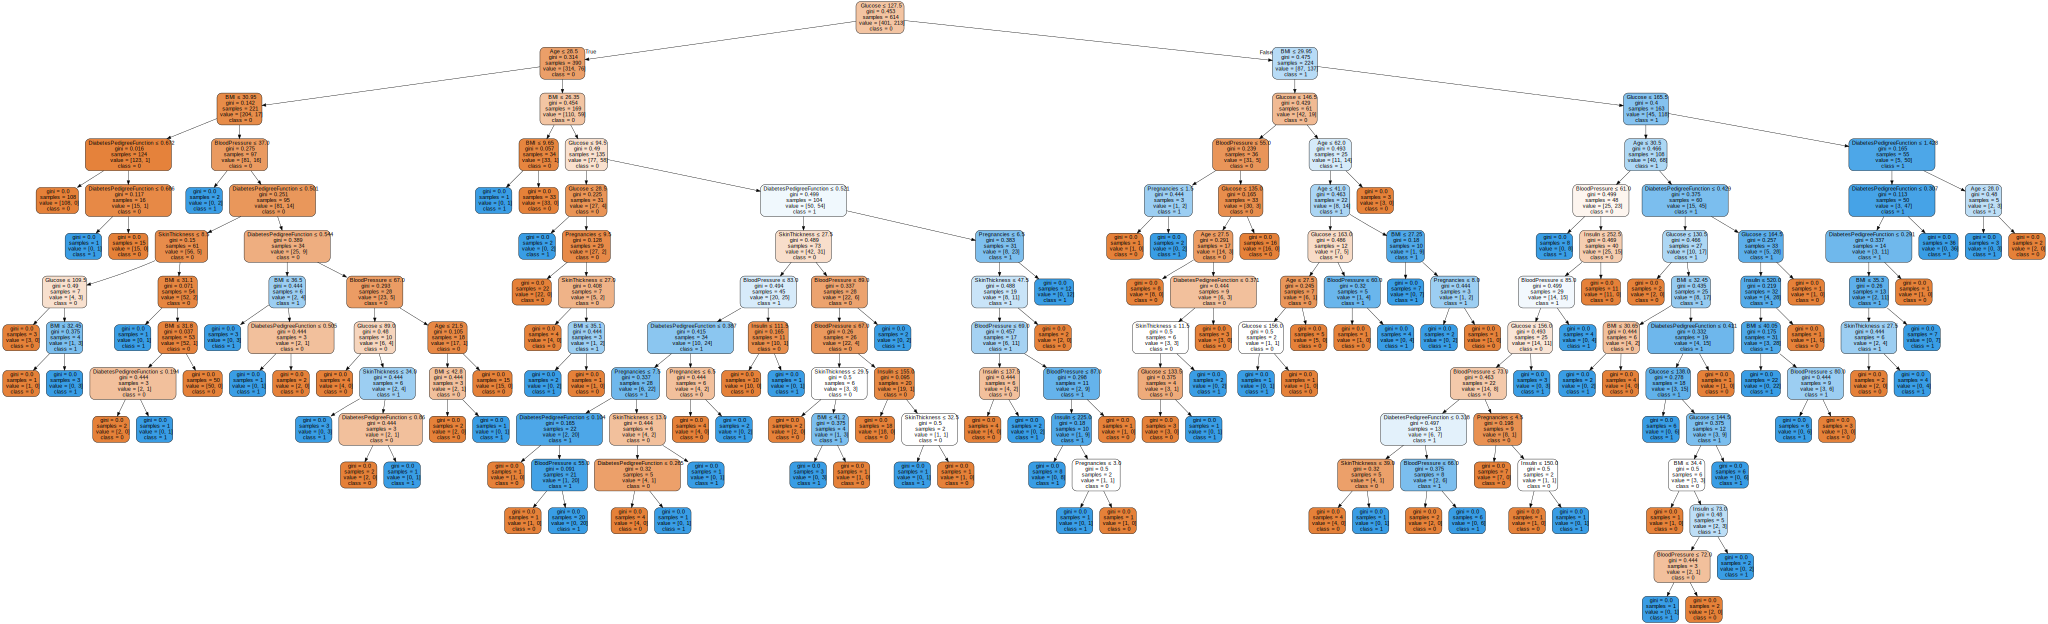

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names = X.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph